# Nectaerra Schagen (Kruiszwin)

Excercises, plotting boreholes, and setting up the model

@TO 20201015

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch, Circle
from matplotlib.transforms import Bbox
import pandas as pd
import flopy
from importlib import reload
import pdb

import os
import sys
tools   = '/Users/Theo/GRWMODELS/python/tools/'
GIS     = '/Users/Theo/GRWMODELS/python/Nectaerra/Kruiszwin/data/QGIS/'
src     = '/Users/Theo/GRWMODELS/python/Nectaerra/Kruiszwin/src/'
home    = '/Users/Theo/GRWMODELS/python/Nectaerra/Kruiszwin/'

sys.path.insert(0, tools)
sys.path.insert(0, src)

import kruiszwin as kzw
from fdm import Grid

os.chdir(home)

attribs = lambda obj: [o for o in dir(obj) if not o.startswith('_')]

# Get the data, which are all stored in an Excel workbook

In [4]:
reload(kzw) # Necessary only when debugging.

# Parameters to generate the model. Well use this as **kwargs

# Get the data from a cross section
dirs = kzw.Dir_struct(home=home, case_folder='Kruiszwin_1',
    executables={'mflow':'mf2005bigsur.mac', 'mt3d': 'mt3dms5b.mac', 'seawat':'swt_v4.mac'})

workbook   = os.path.join(dirs.data, "Julianadorp.xlsx")
layers_df  = pd.read_excel(workbook, sheet_name='Boringen', engine="openpyxl")
piez_df    = pd.read_excel(workbook, sheet_name='Peilbuizen',
                        skiprows=[1], index_col=0, engine="openpyxl")
soil_props = pd.read_excel(workbook, sheet_name='Grondsoort',
                           index_col=0, engine="openpyxl")
spd_df     = pd.read_excel(workbook, sheet_name='SPD', index_col=0, engine="openpyxl")

In [5]:
np.unique(layers_df['name'])

array(['DKMG001', 'DKMG002', 'DKMG003', 'DKMG004', 'DKMG007', 'DKMG010',
       'DKMG101', 'DKMG102', 'DKMG103', 'DKMG104', 'DKMG105', 'DKMG107',
       'DKMG110', 'KRW1', 'KRW2', 'KRW3', 'Rioolgemaal'], dtype=object)

In [6]:
# Get piezometers object (could also be a list)
reload(kzw)
piezoms = kzw.Piezometers(piez_df)

# Make a list of Boring objects and reset their index
borehole = dict()
borehole_names = np.unique(layers_df['name'])
for name in borehole_names:
    borehole[name] = kzw.Boring(name, layers_df.loc[layers_df['name'] == name].copy())                                        
    borehole[name].layers.index = np.arange(len(borehole[name].layers.index), dtype=int)
    # We still have to run method make_layer_patches_and_paths(xlim=(xmin,xmax))
    # Before we can plot the layers. We do than when we know the grid.

## Show the boreholes and the piezometers next to each other

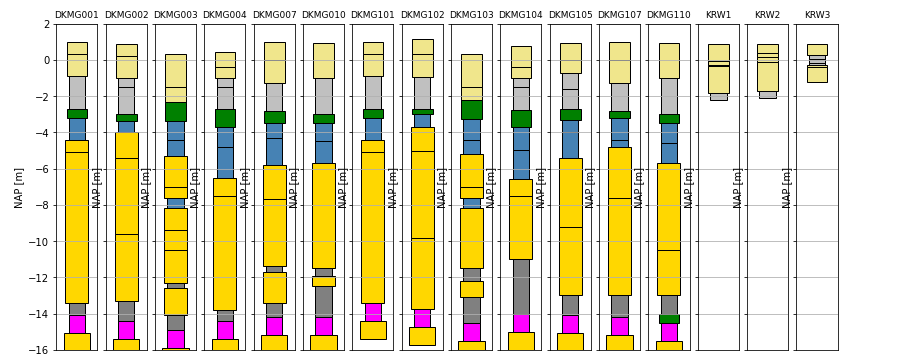

In [7]:
# piezoms.plot() # show piezometes

The purple and orange layers at the bottom are dymmy layers representing the top of the Pleistocene (purple, clay, 100 days, 1 m thick, and orange, sand 25 m/d down to NAP -250 m). These extra layers are necessary for the numerice model.

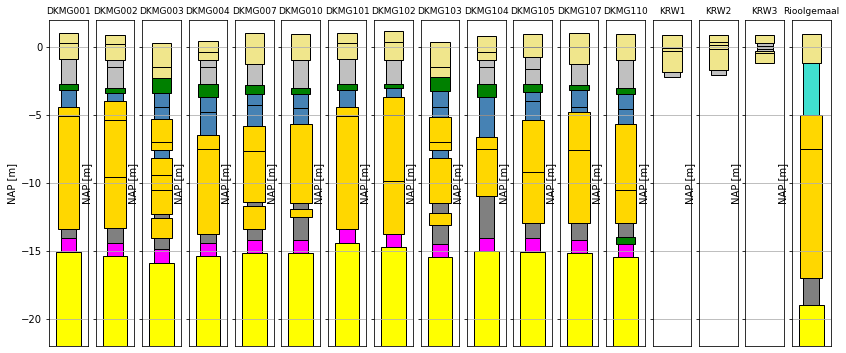

In [8]:
kzw.plot_bores(borehole, title_fontsize=9, ylim=(-22, 2)) # Show boreholes

In [9]:
soil_props

,ibound,strthd,color,width,kh,kv,por,Sy,Ss,al,rho_s,rhob_dry,rhob_wet
name,,,,,,,,,,,,,
zand_H1,-1,0.00,khaki,1.25,5.000,1.000,0.350000,0.20,0.00001,0.1,2650.000000,1722.500000,2072.500000
klei_slap,1,0.00,silver,1.00,0.020,0.004,0.400000,0.05,0.00001,0.1,2650.000000,1590.000000,1990.000000
veen,1,0.00,green,1.25,0.005,0.001,0.500000,0.20,0.00001,0.1,1200.000000,600.000000,1100.000000
klei_blauw,1,-0.68,steelblue,1.00,0.020,0.004,0.350000,0.05,0.00001,0.1,2650.000000,1722.500000,2072.500000
zand_H2,-2,-0.68,gold,1.40,10.000,2.000,0.350000,0.20,0.00001,0.1,2650.000000,1722.500000,2072.500000
klei_Hb,1,-0.68,gray,1.00,0.020,0.004,0.400000,0.05,0.00001,0.1,2650.000000,1590.000000,1990.000000
veen_Hb,1,-0.68,green,1.25,0.005,0.001,0.500000,0.05,0.00001,0.1,1200.000000,600.000000,1100.000000
klei_Pleis_Top,1,-0.68,magenta,1.00,0.010,0.002,0.400000,0.05,0.00001,0.1,2650.000000,1590.000000,1990.000000
zand_Pleist,-3,-0.68,yellow,1.60,62.500,1.000,0.400000,0.20,0.00001,0.1,2650.000000,1590.000000,1990.000000


In [10]:
trenches = kzw.Trench_collection(os.path.join(GIS, 'punten.shp'),
                      os.path.join(GIS, 'Kruiswin12(345)_lijn.shp'), mv=0.76)

165.3383596660753 -19.555123583086175 111488.3020249312 545023.7293907295
214.4653608599308 -7.560655165248524 111714.89652273533 545153.3798707565
212.86882775075733 -28.370912167351896 111715.28163162571 545168.8913730184
257.1169913906391 -22.644455730334734 111471.33820159288 544933.2636581684
55.661253153329255 34.40823973584305 111553.52047924454 545212.4023374061
215.16486404247286 8.942137694501394 111717.8383884356 545171.8830496639
70.2493615697602 -43.644304056460186 111567.9225511282 545215.950665099
237.18671426414937 25.35958566508255 111490.94531665086 544951.5210943774
223.21984959319713 16.973817733121383 111477.35151134152 544966.6797840375
149.8560116231451 13.90179114081074 111442.1452615927 545051.57889986
182.28267869123022 11.255951994518947 111452.21519792972 545013.4095216342
165.4319841376435 9.557982074552118 111668.17492199814 545174.7323411094
220.94342710675457 13.872696208825545 111486.5561478752 544968.0779358024
145.0429427514029 11.641949983161314 1116

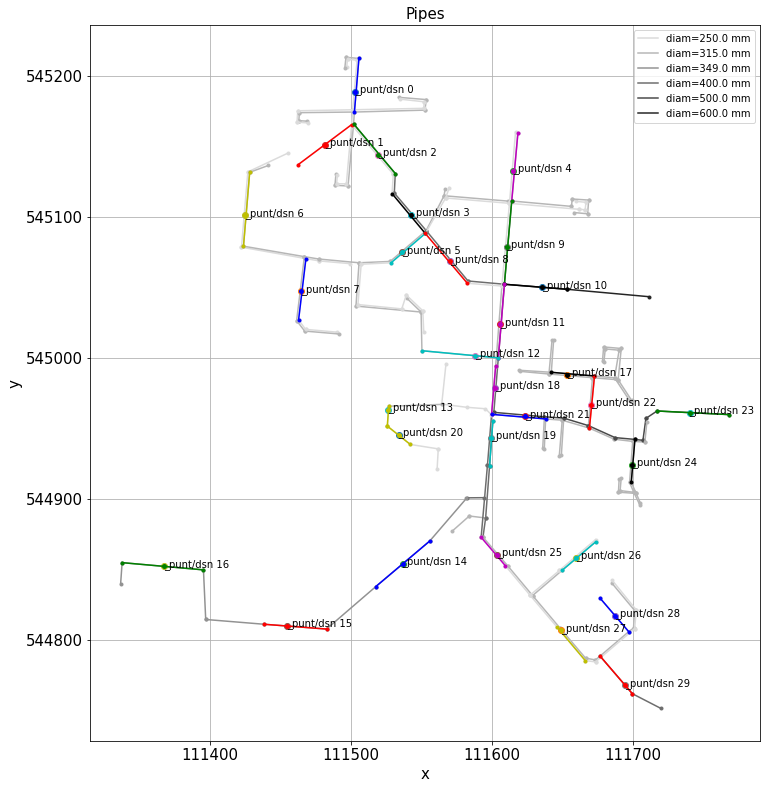

In [11]:
ax = kzw.newfig("Pipes","x","y", size_inches=(12, 17))
trenches.plot_pipes(ax=ax)
trenches.plot_points(ax=ax)
ax.set_aspect(1.)

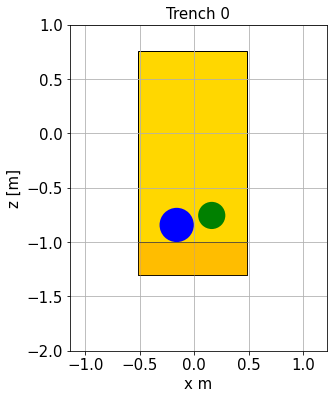

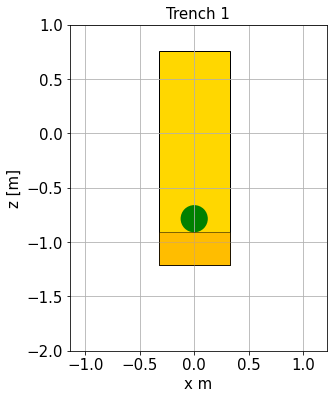

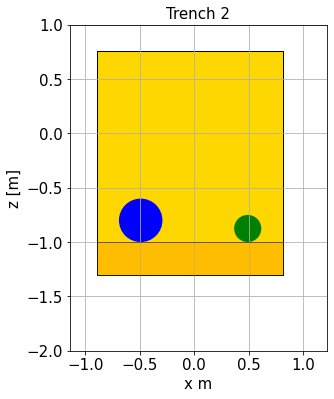

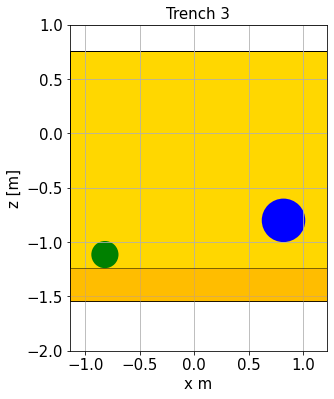

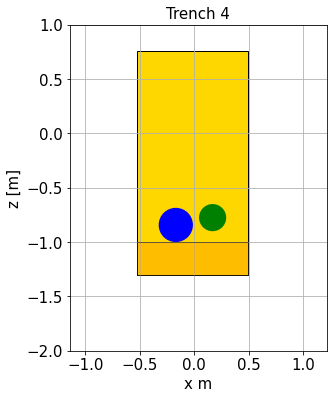

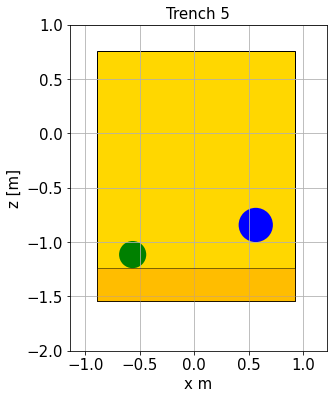

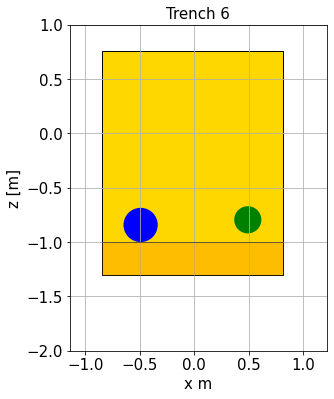

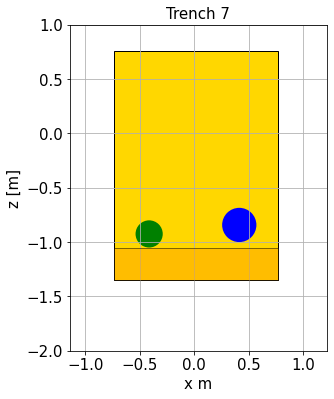

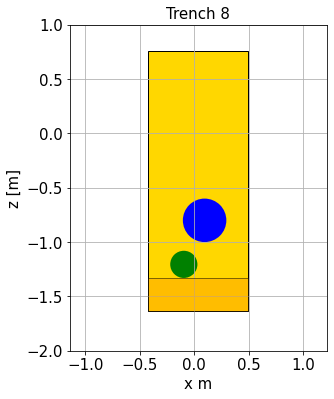

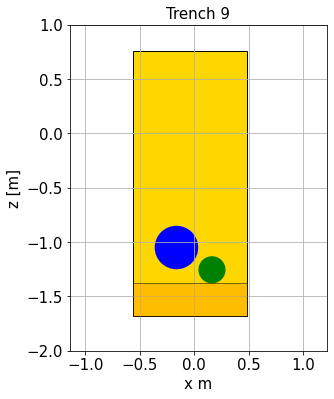

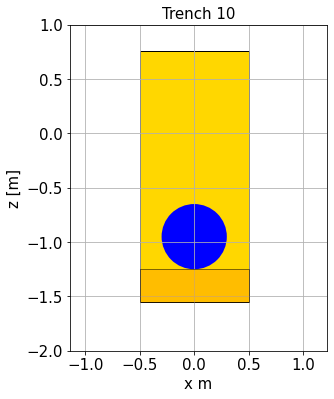

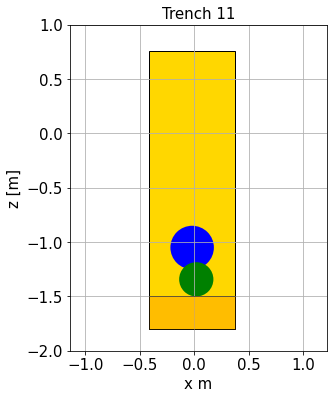

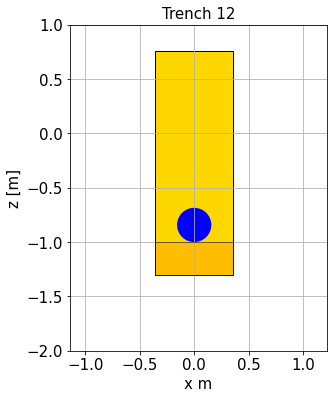

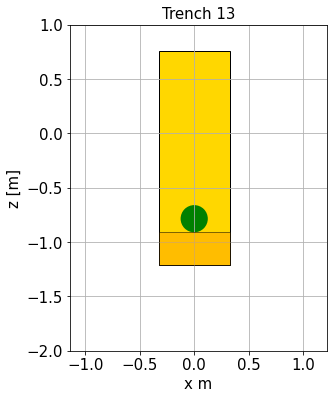

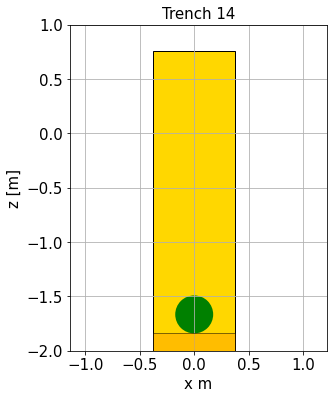

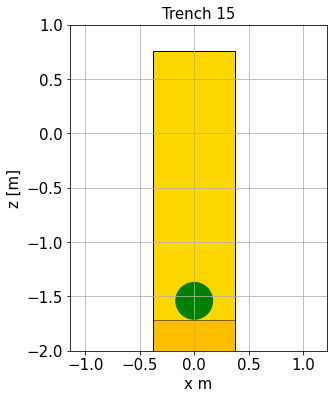

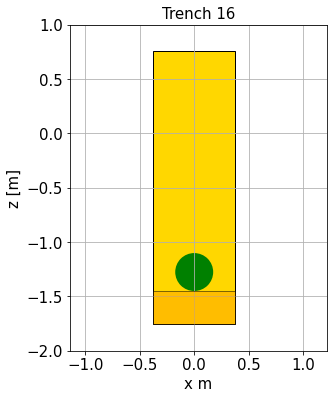

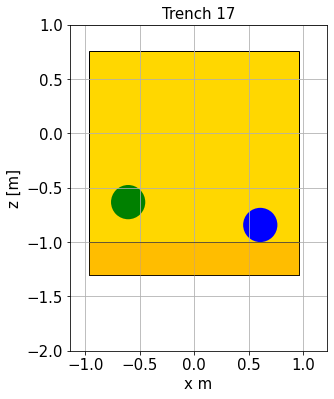

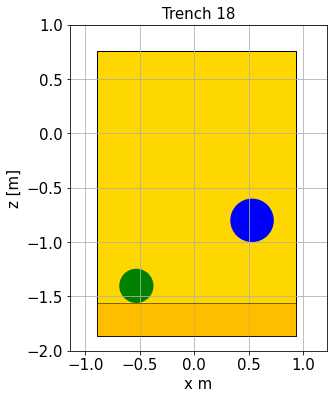

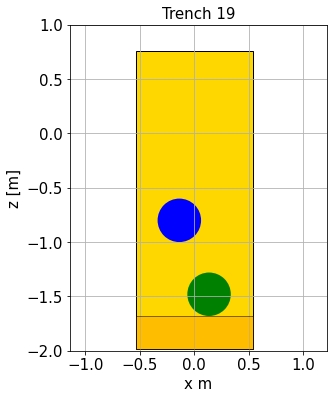

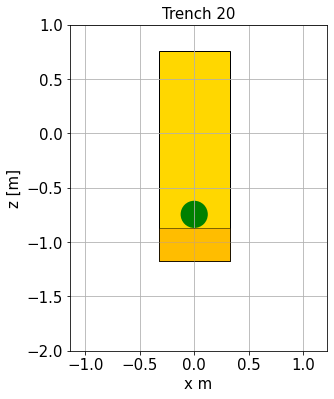

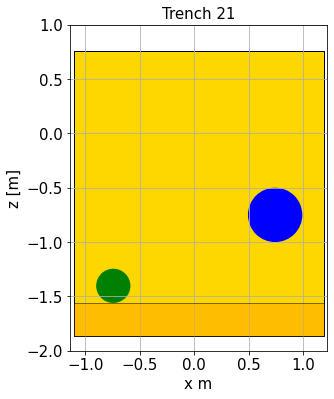

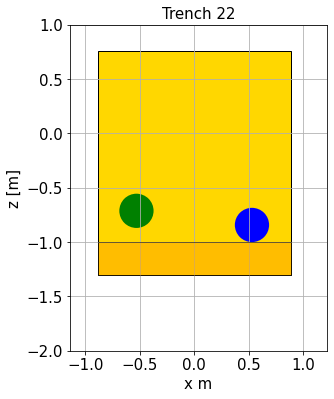

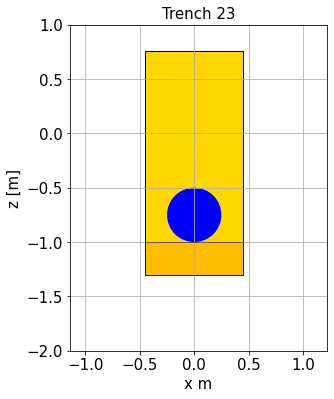

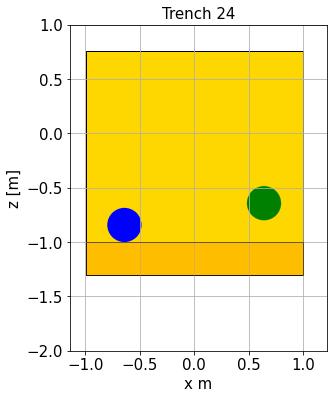

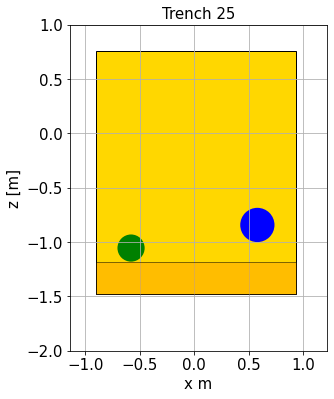

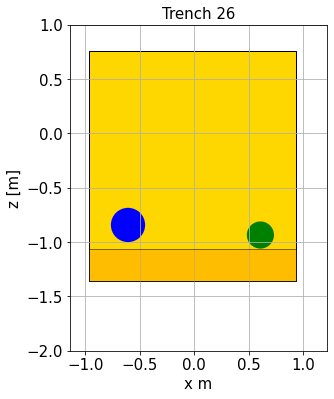

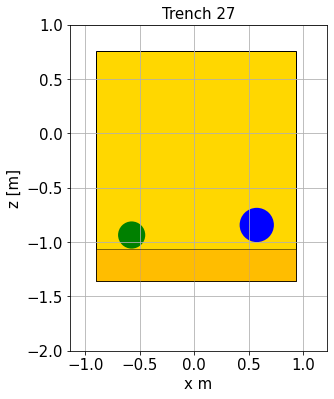

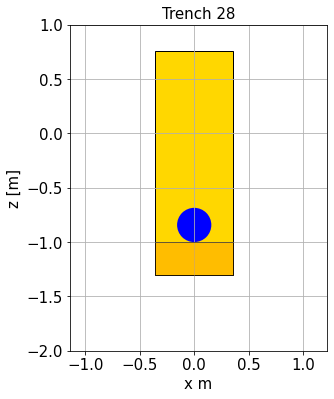

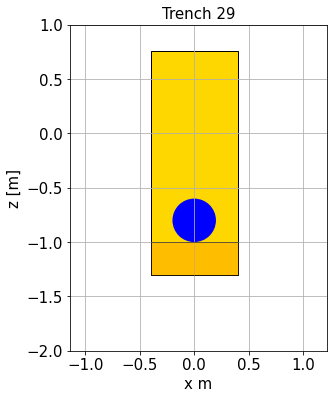

In [12]:
trenches.plot_trenches(ylim=(-2, 1))

In [13]:
borehole.keys()

dict_keys(['DKMG001', 'DKMG002', 'DKMG003', 'DKMG004', 'DKMG007', 'DKMG010', 'DKMG101', 'DKMG102', 'DKMG103', 'DKMG104', 'DKMG105', 'DKMG107', 'DKMG110', 'KRW1', 'KRW2', 'KRW3', 'Rioolgemaal'])

# Show section with trench and pipe based on borehole with given name

In [14]:
borehole[name].layers

,name,NAPtop,NAPbot,D,soiltype,stype,ibound,strthd,color,profile_width,...,por,Sy,Ss,al,rhos,rhob_dry,rhob_wet,profile_patch,layer_patch,path
0,Rioolgemaal,0.93,-1.2,2.13,zand_ophooglaag,zand_H1,-1,0.00,khaki,1.25,...,0.350000,0.20,0.000021,0.1,2650.000000,1722.500000,2072.500000,"PathPatch5((-0.3125, 0.93) ...)","PathPatch5((-5, 0.93) ...)","Path(array([[-5. , 0.93],\n [-5. , -1..."
1,Rioolgemaal,-1.20,-5.0,3.80,"klei-veen, slap",klei_slap_veen,1,-0.68,turquoise,1.00,...,0.416667,0.10,0.000038,0.1,2166.666667,1304.166667,1720.833333,"PathPatch5((-0.25, -1.2) ...)","PathPatch5((-5, -1.2) ...)","Path(array([[-5. , -1.2],\n [-5. , -5. ]..."
2,Rioolgemaal,-5.00,-7.5,2.50,"zand, fijn, kleilenzen",zand_H2,-2,-0.68,gold,1.40,...,0.350000,0.20,0.000025,0.1,2650.000000,1722.500000,2072.500000,"PathPatch5((-0.35, -5) ...)","PathPatch5((-5, -5) ...)","Path(array([[-5. , -5. ],\n [-5. , -7.5]..."
3,Rioolgemaal,-7.50,-17.0,9.50,"wadzand, fijn tot matig fijn, silthoudend met ...",zand_H2,-2,-0.68,gold,1.40,...,0.350000,0.20,0.000095,0.1,2650.000000,1722.500000,2072.500000,"PathPatch5((-0.35, -7.5) ...)","PathPatch5((-5, -7.5) ...)","Path(array([[ -5. , -7.5],\n [ -5. , -1..."
4,Rioolgemaal,-17.00,-19.0,2.00,klei,klei_Hb,1,-0.68,gray,1.00,...,0.400000,0.05,0.000020,0.1,2650.000000,1590.000000,1990.000000,"PathPatch5((-0.25, -17) ...)","PathPatch5((-5, -17) ...)","Path(array([[ -5., -17.],\n [ -5., -19.]..."
5,Rioolgemaal,-19.00,-40.0,21.00,WVP1,zand_pleist,-3,-0.68,yellow,1.60,...,0.400000,0.20,0.000210,0.1,2650.000000,1590.000000,1990.000000,"PathPatch5((-0.4, -19) ...)","PathPatch5((-5, -19) ...)","Path(array([[ -5., -19.],\n [ -5., -40.]..."


In [15]:
# Need gr to plot this. gr is defined further down.
# name = 'DKMG010'
# for itr in range(10,20):
#     ax = kzw.newfig("Profile, trench {}, borehole={}".format(itr, name), "x-section", "NAP")
#     kzw.plot_section(boring=borehole[name], trench=trenches.trenches[itr], xlim=gr.x[[0, -1]], ylim=(-16, 2), ax=ax)

Trench 21 is de diepste in combinatie met de breedste. Trenches met buisdiameter 349 zijn buizen waarvan geen buisdiamter bekend was in het ontvangen bestand.

# Salinities

Instantiate a `Salinity_profiles` object (in module `'kruiszwin.py`, that will hold the profiles in an internal dict called `self.profiles`. The keys are the borehole/location names and the fields are `mv`, `Depth [m]`, `z`, `TDS [mg/l]`. `z` is elevation relative to NAP datum.

We can plot each and every profile as shown next. And we can interpolate the data to a desired set of depths.

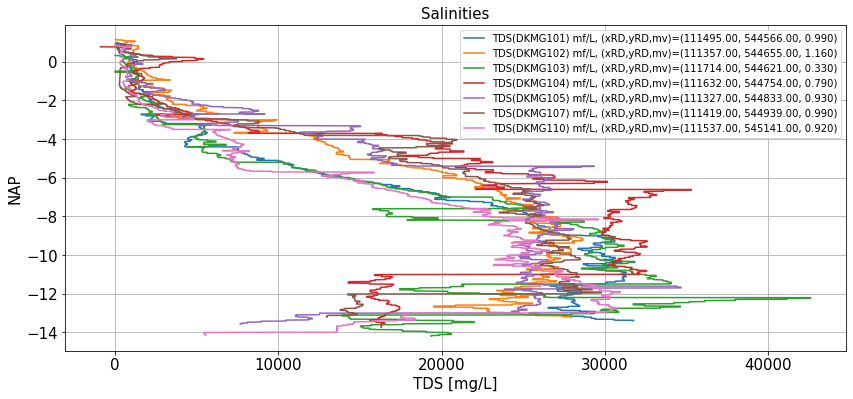

In [16]:
reload(kzw)
tds_profiles = kzw.Salinity_profile_collection(workbook, sheet_name='Salinities', coords_sheet='Coords')

ax = kzw.newfig("Salinities", "TDS [mg/L]", "NAP")

tds_profiles.plot(ax=ax)
ax.legend()

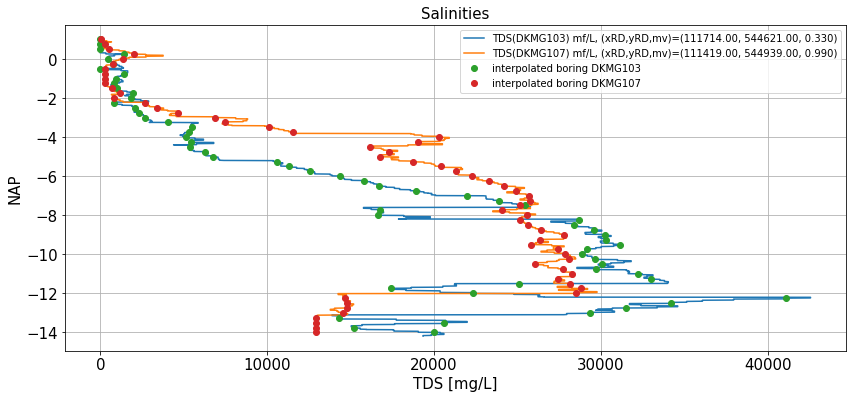

In [17]:
ax = kzw.newfig("Salinities", "TDS [mg/L]", "NAP")
names = ['DKMG103', 'DKMG107']

# Show these specific profiles
tds_profiles.plot(names=names, ax=ax)

# Interpolate and show them on top of the previous ones
zdata=np.linspace(1, -14, 61)
for name in names:
    ZTDS = tds_profiles[name].interp(zdata=np.linspace(1, -14, 61))
    ax.plot(ZTDS[0], ZTDS[1], 'o', label="interpolated boring {}".format(name))
ax.legend()

# Show salinities on/with a section

Using subplots(2, 1, sharey=True)

In [18]:
names = set(borehole.keys()).intersection(tds_profiles.profiles.keys())
names

{'DKMG101', 'DKMG102', 'DKMG103', 'DKMG104', 'DKMG105', 'DKMG107', 'DKMG110'}

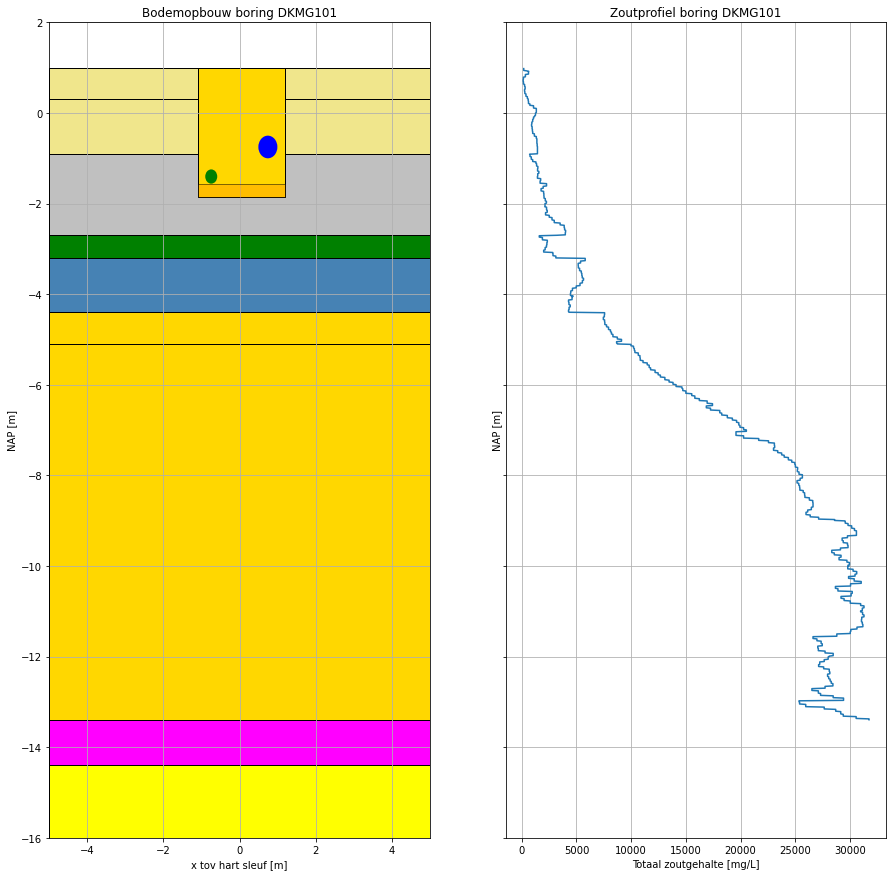

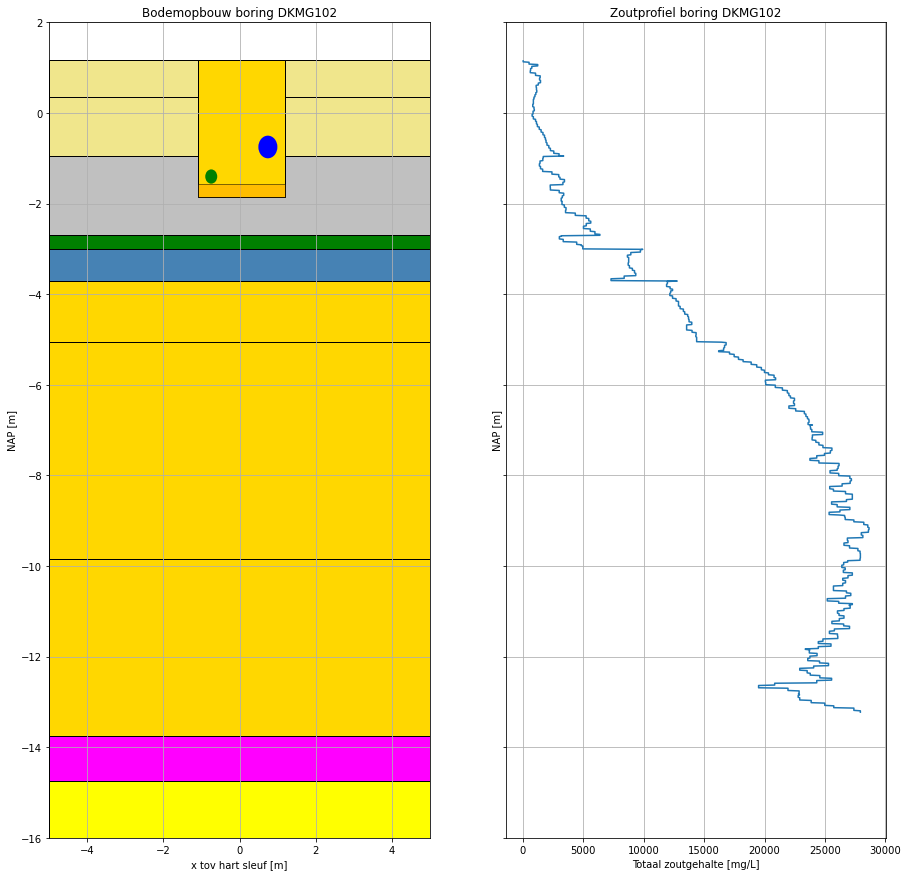

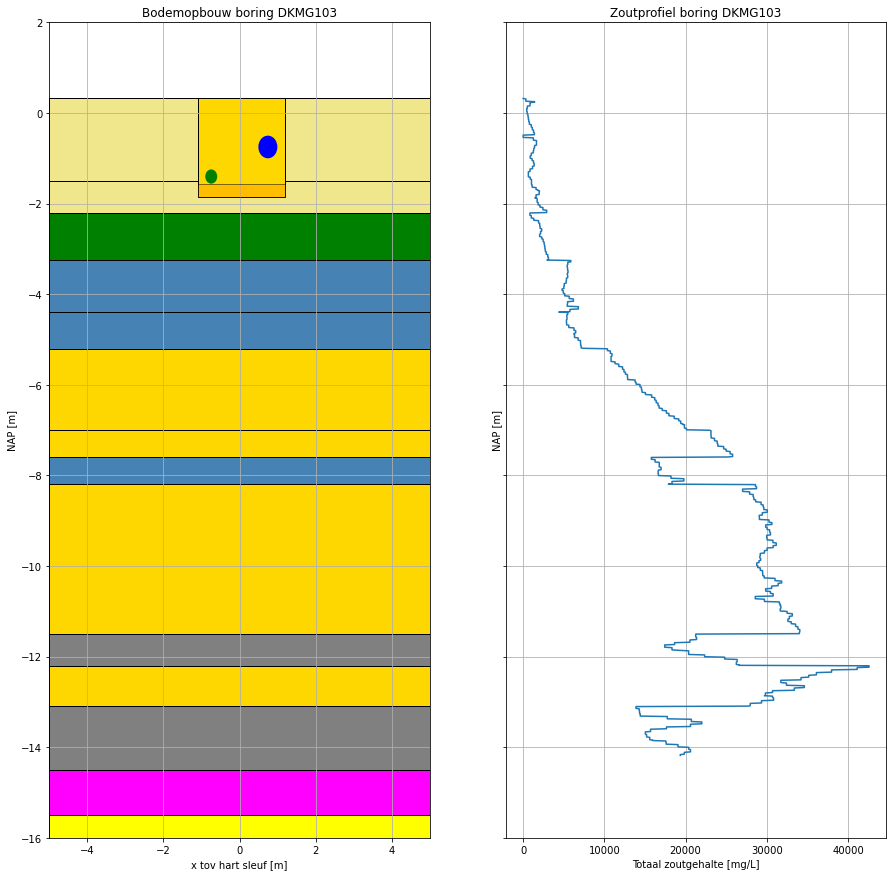

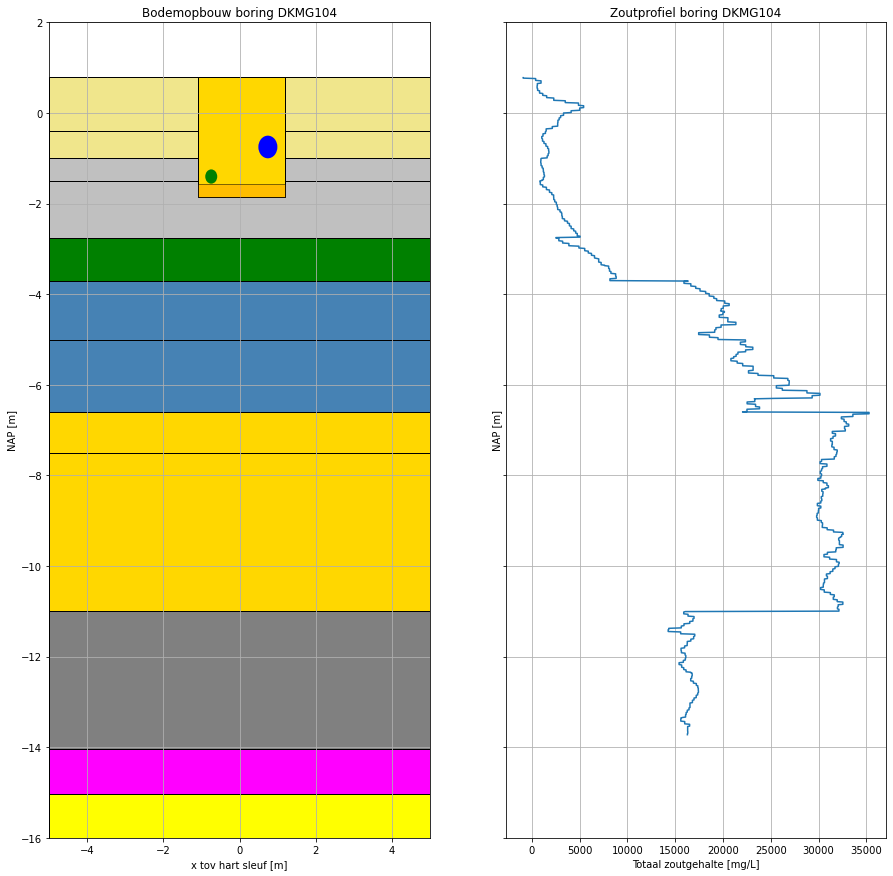

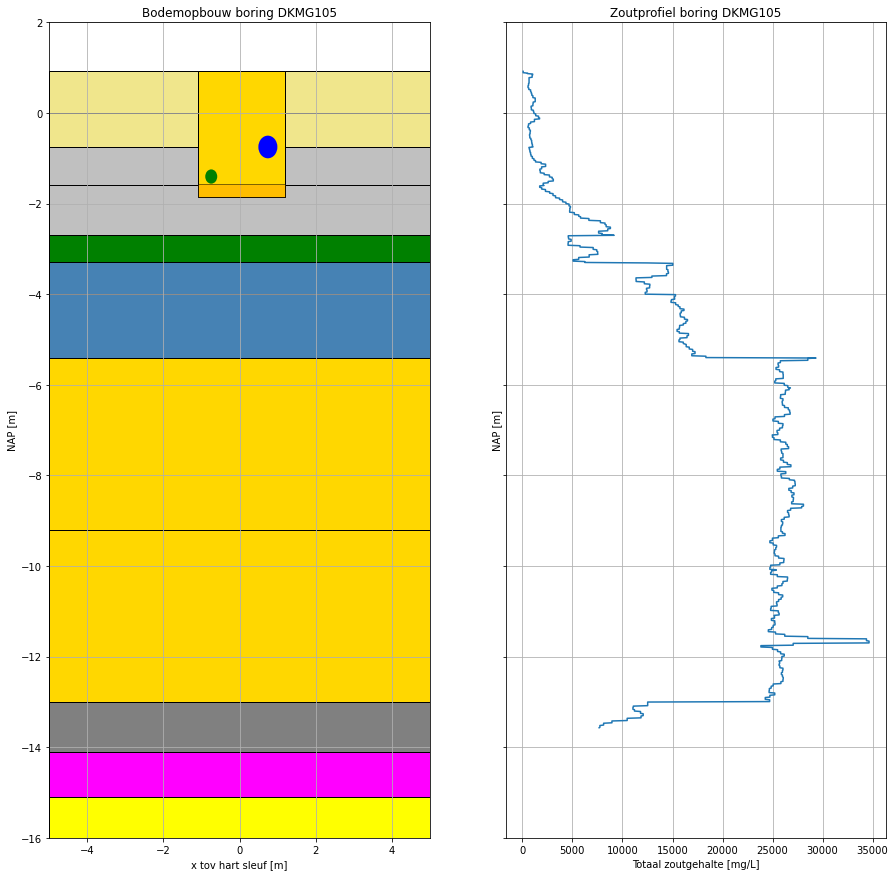

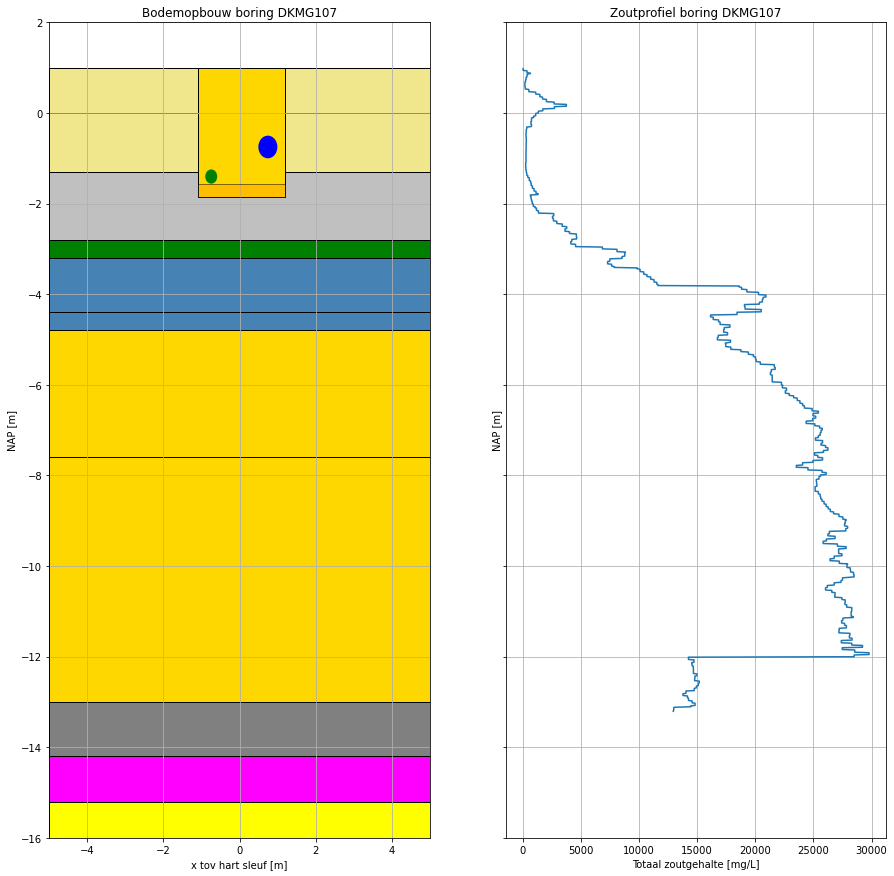

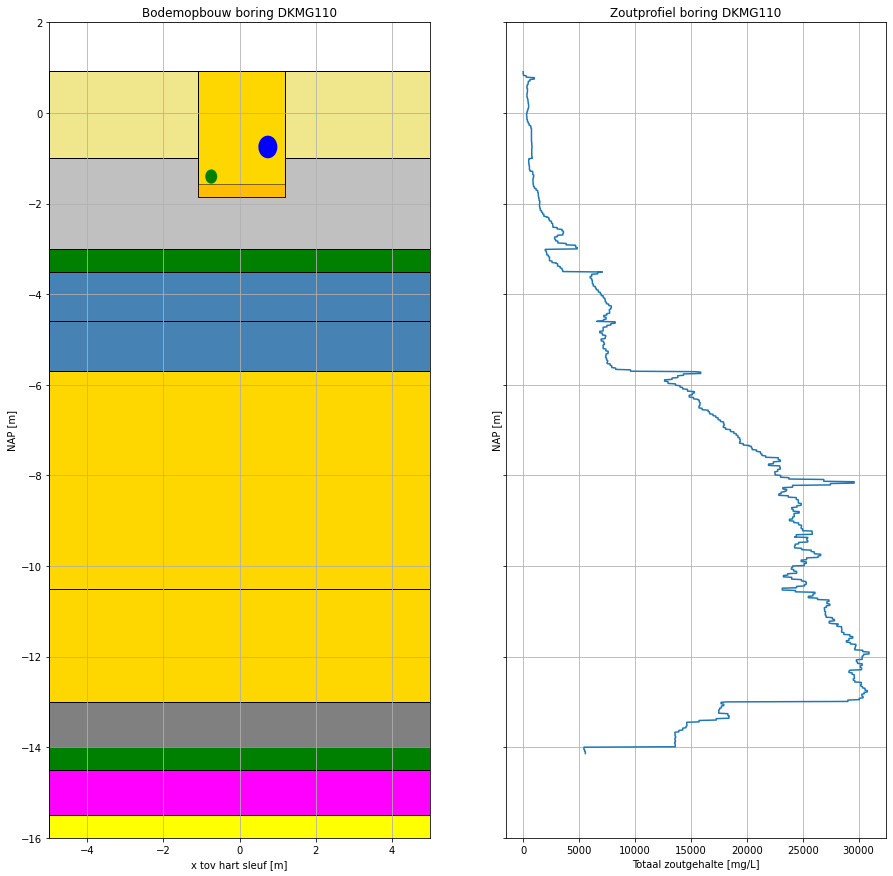

In [19]:
def twoaxes(name):
    titles =(f'Bodemopbouw boring {name}', f'Zoutprofiel boring {name}')
    xlabels =('x tov hart sleuf [m]', 'Totaal zoutgehalte [mg/L]')
    ylabels = ('NAP [m]', 'NAP [m]')
    fig, axes = plt.subplots(1, 2, sharey=True)
    fig.set_size_inches(15, 15)
    for ax, title, xlabel, ylabel in zip(axes, titles, xlabels, ylabels):
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.grid()
    return axes
    

itr = 21 # should be a trench near the borehole, this only refers to the trench excavation.
for name in sorted(names):
    ax0, ax1 = twoaxes(name)
    kzw.plot_section(boring=borehole[name], trench=trenches.trenches[itr], ylim=(-16, 2), ax=ax0, aspect='auto',
                    xlim=(-5, 5))
    tds_profiles.plot(names=name, ax=ax1)

# Overzicht van de trenches op de gekozen 30 punten in het projectgebied

In [20]:
trs = trenches.trenches
for itr, tr in enumerate(trs):
    xz = tr.trench_path.vertices
    zmin = np.min(xz[:, 1])
    w = np.max(xz[:, 0]) - np.min(xz[:, 0])
    x, y = tr.pm
    d1 = tr.pipes[0]['diam']
    d2 = tr.pipes[1]['diam']
    t1 = tr.pipes[0]['type']
    t2 = tr.pipes[0]['type']
    s = f'trench {itr:2d}, xRD={x:8.0f}, yRD={y:8.0f}, w={w:6.2f}, z_min={zmin:6.2f}, d1={d2:6.0f}/{t1}'
    if tr.ip[0] != tr.ip[1]:
        s += f', d2={d2:6.0f}/{t2} mm'
    print(s)

trench  0, xRD=  111503, yRD=  545188, w=  1.01, z_min= -1.30, d1=   250/HWA, d2=   250/HWA mm
trench  1, xRD=  111482, yRD=  545151, w=  0.65, z_min= -1.21, d1=   250/DWA
trench  2, xRD=  111519, yRD=  545144, w=  1.71, z_min= -1.30, d1=   250/HWA, d2=   250/HWA mm
trench  3, xRD=  111543, yRD=  545102, w=  2.37, z_min= -1.54, d1=   400/DWA, d2=   400/DWA mm
trench  4, xRD=  111615, yRD=  545133, w=  1.02, z_min= -1.30, d1=   250/HWA, d2=   250/HWA mm
trench  5, xRD=  111536, yRD=  545075, w=  1.81, z_min= -1.54, d1=   315/DWA, d2=   315/DWA mm
trench  6, xRD=  111425, yRD=  545101, w=  1.67, z_min= -1.30, d1=   250/HWA, d2=   250/HWA mm
trench  7, xRD=  111465, yRD=  545047, w=  1.51, z_min= -1.35, d1=   315/DWA, d2=   315/DWA mm
trench  8, xRD=  111571, yRD=  545068, w=  0.92, z_min= -1.63, d1=   400/DWA, d2=   400/DWA mm
trench  9, xRD=  111611, yRD=  545079, w=  1.05, z_min= -1.68, d1=   250/HWA, d2=   250/HWA mm
trench 10, xRD=  111636, yRD=  545050, w=  1.00, z_min= -1.55, d1=  

# Fill a Modflow model first

# Get the modflow parameters and fill the arrays

To do this pass the borehole and the trench on which the model is to be based

In [21]:
# Generate the collection of trenches
reload(kzw)
trenches = kzw.Trench_collection(os.path.join(GIS, 'punten.shp'),
                      os.path.join(GIS, 'Kruiswin12(345)_lijn.shp'), mv=0.76)

# Choose a trench for use in the model, we use trench 21 here.
itr = 21 # Trench number to use.
use_trench = trenches[itr]

# set its soil properties.
use_trench.set_soil_props(soil_props.loc['zand_trench'].copy(), trench_name=f'SLEUF_{itr}')

# ========== Generate Grid based on borehole layers and trench =========================================

# Choose the borehole to base the model on
name = "DKMG110"

# Choose grid line coordinates
x = np.hstack((np.linspace(0, 5, 21), np.logspace(np.log10(5), np.log10(250), 60)))
x = np.hstack((-x[::-1], x))
z = -np.linspace(0.5, 20, 78)

# rather base Z for MODFLOW on the borehole layers themselves and the trench
# z = np.unique(np.hstack((borehole[name].layers['NAPtop'].values,
#                borehole[name].layers['NAPbot'].values,
#                borehole[name].layers['NAPbot'].values[:-1] + 0.05, # extra yields nicer contours                        
#                trench.ghb_path.vertices.T[1])))[::-1]

# We need the x and z coordinates of our grid lines without considering the trench and the layers exactly
gr = kzw.generate_grid(borehole[name], trench=use_trench, x=x, z=[0.5], zrefine=0.25)

# Because the top aquifer is thin and has a free water table, adapt the top of the grid to this
# water table. (This is because wetting does not lead to convergence in MODFLOW2005 and, therefor, seawat.)
if False:
    Z = gr.Z; Z[0] = np.fmax(hds.get_water_table(), Z[1] + 0.01)
    gr = Grid(gr.x, gr.y, Z) # redefine gr using update top of teh grid mesh.
    # Top and bottom of the water tabel
    print(np.min(gr.Z[0]), np.max(Z[0]))

    # Make sure the borehole layer patches match with the width of the model
for name in borehole:
    borehole[name].mk_layer_patches_and_paths(xlim=(gr.x[0], gr.x[-1]))

165.3383596660753 -19.555123583086175 111488.3020249312 545023.7293907295
214.4653608599308 -7.560655165248524 111714.89652273533 545153.3798707565
212.86882775075733 -28.370912167351896 111715.28163162571 545168.8913730184
257.1169913906391 -22.644455730334734 111471.33820159288 544933.2636581684
55.661253153329255 34.40823973584305 111553.52047924454 545212.4023374061
215.16486404247286 8.942137694501394 111717.8383884356 545171.8830496639
70.2493615697602 -43.644304056460186 111567.9225511282 545215.950665099
237.18671426414937 25.35958566508255 111490.94531665086 544951.5210943774
223.21984959319713 16.973817733121383 111477.35151134152 544966.6797840375
149.8560116231451 13.90179114081074 111442.1452615927 545051.57889986
182.28267869123022 11.255951994518947 111452.21519792972 545013.4095216342
165.4319841376435 9.557982074552118 111668.17492199814 545174.7323411094
220.94342710675457 13.872696208825545 111486.5561478752 544968.0779358024
145.0429427514029 11.641949983161314 1116

In [22]:
gr.Z[0]

array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5]])

In [23]:
name = 'DKMG110'
par_mf = kzw.get_mflow_parameters(workbook_name=workbook, sheet_name='MFLOW',
                            layers=borehole[name].layers, trench=use_trench, gr=gr)

In [24]:
par_mf['bas']['ibound'][:, 0, [0,-1]]
par_mf['bas'][  'strt'][:, 0, [0,-1]]
par_mf['bas'][  'strt'][:, 0, -1]
par_mf['bas']['ibound'][:-12, 0, 72:88]
par_mf['bas']['strt'][:-12, 0, 72:88]

array([[ 0.   ,  0.   ,  0.   , -0.25 , -0.25 , -0.25 , -0.25 , -0.25 ,
        -0.25 , -0.25 , -0.25 , -0.25 , -0.25 ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , -1.25 , -1.25 , -1.25 , -1.25 , -1.25 ,
        -1.25 , -1.25 , -1.25 , -1.25 , -1.25 ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , -1.625, -1.625, -1.625, -1.625, -1.625,
        -1.625, -1.625, -1.625, -1.625, -1.625,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , -1.805, -1.805, -1.805, -1.805, -1.805,
        -1.805, -1.805, -1.805, -1.805, -1.805,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0

# Check the modflow parameters

In [25]:
for k in par_mf.keys():
    print()
    print('key ', k, ':')
    print(par_mf[k].keys())
    print


key  bas :
dict_keys(['ibound', 'strt', 'ifrefm', 'ixsec', 'ichflg', 'stoper', 'hnoflo'])

key  dis :
dict_keys(['nlay', 'nrow', 'ncol', 'delr', 'delc', 'top', 'botm', 'laycbd', 'nper', 'perlen', 'nstp', 'tsmult', 'steady', 'itmuni', 'lenuni', 'xul', 'yul', 'rotation', 'proj4_str'])

key  evt :
dict_keys(['nevtop', 'evtr', 'surf', 'exdp', 'ipakcb'])

key  lpf :
dict_keys(['ipakcb', 'hdry', 'laytyp', 'layavg', 'chani', 'layvka', 'laywet', 'wetfct', 'iwetit', 'ihdwet', 'hk', 'hani', 'vka', 'ss', 'sy', 'vkcb', 'wetdry', 'storagecoefficient', 'constantcv', 'thickstrt', 'nocvcorrection', 'novfc'])

key  oc :
dict_keys(['ihedfm', 'iddnfm', 'chedfm', 'cddnfm', 'cboufm', 'stress_period_data', 'compact'])

key  pcg :
dict_keys(['mxiter', 'iter1', 'npcond', 'hclose', 'rclose', 'relax', 'nbpol', 'iprpcg', 'mutpcg', 'damp', 'dampt', 'ihcofadd'])

key  rch :
dict_keys(['nrchop', 'rech', 'irch', 'ipakcb'])

key  sms :
dict_keys(['mxiter', 'iter1', 'hclose', 'hiclose', 'nonlinmeth', 'linmeth'])

key

In [26]:
def listpar(pardict, parname):
    print(f"{parname}")
    print(str(pardict[parname][:, 0, :]))
    print(f"Unique values for {parname}: ", np.unique(pardict[parname].ravel()))

listpar(par_mf['bas'], 'ibound')
listpar(par_mf['bas'], 'strt')
listpar(par_mf['lpf'], 'hk')
listpar(par_mf['lpf'], 'vka')
listpar(par_mf['lpf'], 'ss')
listpar(par_mf['lpf'], 'sy')

ibound
[[-1  1  1 ...  1  1 -1]
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 ...
 [-3  1  1 ...  1  1 -3]
 [-3  1  1 ...  1  1 -3]
 [-3  1  1 ...  1  1 -3]]
Unique values for ibound:  [-4 -3 -2 -1  1]
strt
[[ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 ...
 [-0.68  0.    0.   ...  0.    0.   -0.68]
 [-0.68  0.    0.   ...  0.    0.   -0.68]
 [-0.68  0.    0.   ...  0.    0.   -0.68]]
Unique values for strt:  [-1.805 -1.625 -1.25  -0.68  -0.25   0.   ]
hk
[[5.00e+00 5.00e+00 5.00e+00 ... 5.00e+00 5.00e+00 5.00e+00]
 [2.00e-02 2.00e-02 2.00e-02 ... 2.00e-02 2.00e-02 2.00e-02]
 [2.00e-02 2.00e-02 2.00e-02 ... 2.00e-02 2.00e-02 2.00e-02]
 ...
 [6.25e+01 6.25e+01 6.25e+01 ... 6.25e+01 6.25e+01 6.25e+01]
 [6.25e+01 6.25e+01 6.25e+01 ... 6.25e+01 6.25e+01 6.25e+01]
 [6.25e+01 6.25e+01 6.25e+01 ... 6.25e+01 6.25e+01 6.25e+01]]
Unique values for hk:  [5.00e-03 1.00e-02 2.00e-02 5.00e+00 1.00e+01 6.25e+01]
v

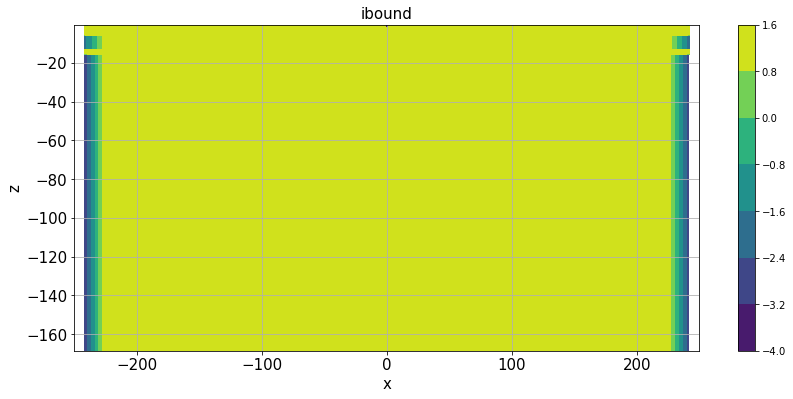

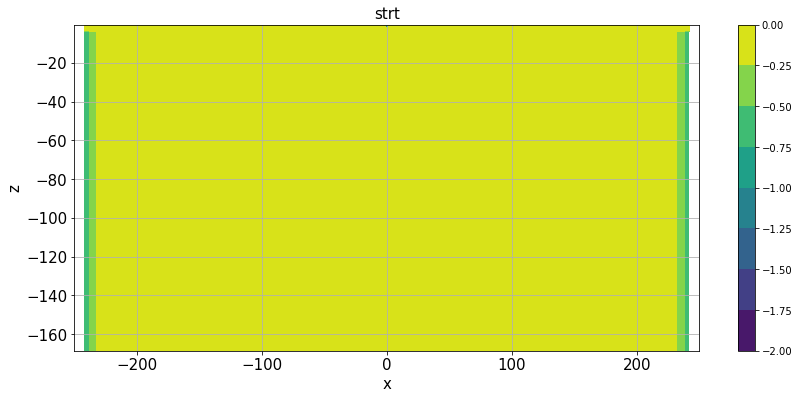

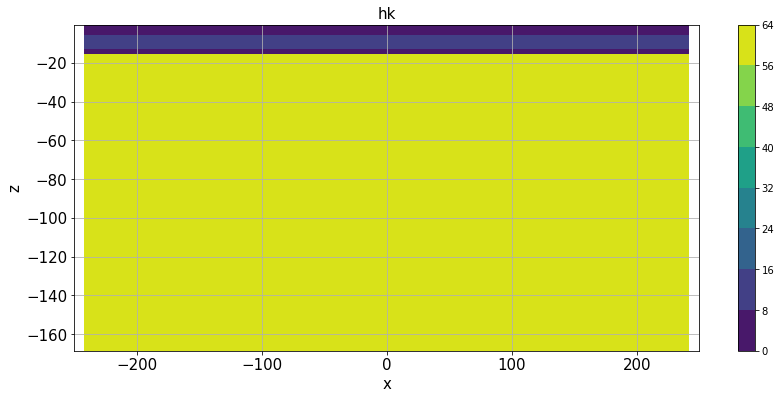

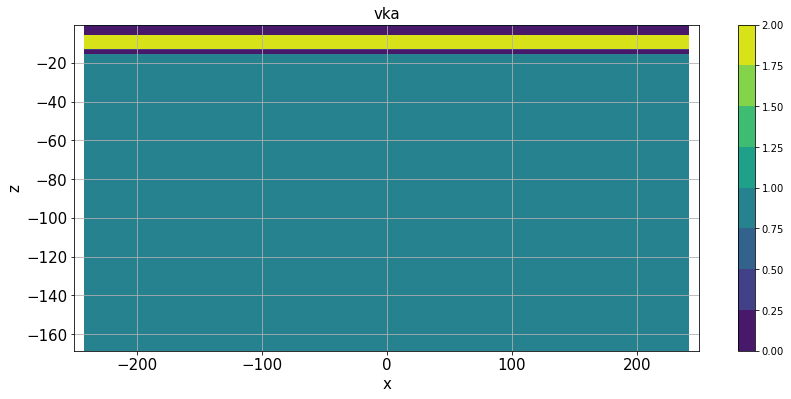

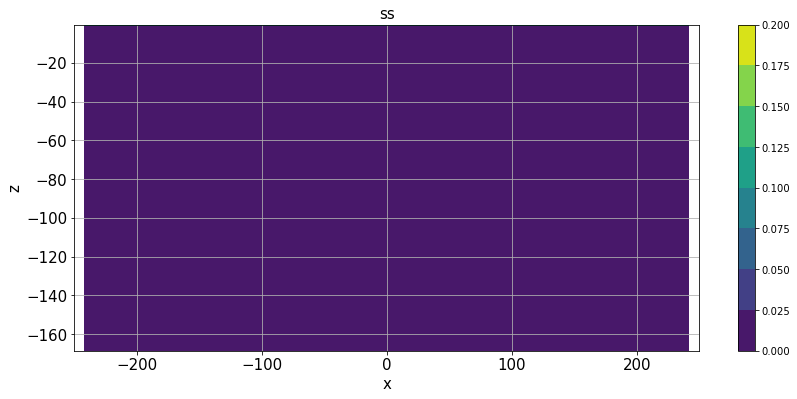

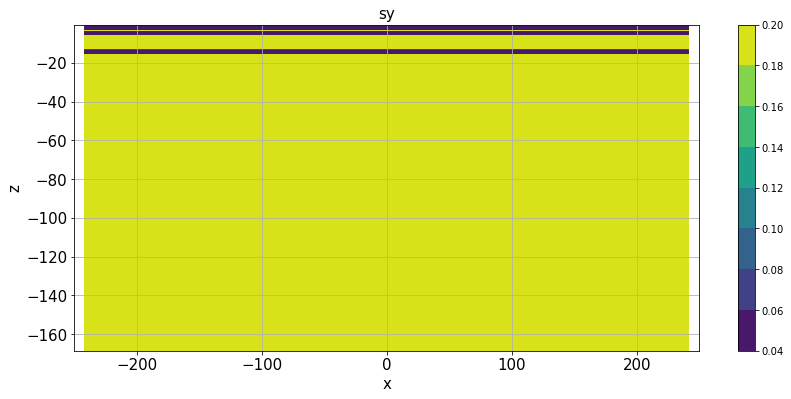

In [27]:
def showpar(pardict, parname, gr=gr, xlim=None, ylim=None):
    ax = kzw.newfig(f"{parname}", "x", "z", xlim=xlim, ylim=ylim)
    c = ax.contourf(gr.xm, gr.zm, pardict[parname][:, 0, :])
    plt.colorbar(c,ax=ax)
    
kw = {'xlim': (-5, 5), 'ylim': (-16, 2)}
kw = {'xlim': gr.x[[0, -1]], 'ylim': None}

showpar(par_mf['bas'], 'ibound', **kw)
showpar(par_mf['bas'], 'strt', **kw)
showpar(par_mf['lpf'], 'hk', **kw)
showpar(par_mf['lpf'], 'vka', **kw)
showpar(par_mf['lpf'], 'ss', **kw)
showpar(par_mf['lpf'], 'sy', **kw)

In [28]:
par_mf.keys()

dict_keys(['bas', 'dis', 'evt', 'lpf', 'oc', 'pcg', 'rch', 'sms', 'upw'])

In [29]:
#%% Ghb points
bdd = {} # no ghb riv of other boundary conditions.

case_mf = 'justmodflow'
case_mt = 'justMT3d'
case_sw = 'justSeawat'

run_seawat = True

#%% MODFLOW
model = kzw.modflow(dirs=dirs, case=case_mf, par=par_mf, bdd=bdd)

Adding justmodflow.hds (unit=51) to the output list.
adding Package:  OC
adding Package:  DIS
adding Package:  BAS6
Adding justmodflow.cbc (unit=53) to the output list.
adding Package:  RCH
adding Package:  EVT
adding Package:  LPF
adding Package:  PCG
adding Package:  LMT6
Pakages used:[dis, bas, rch, evt, oc, lpf, pcg, lmt]

Writing packages:
   Package:  OC
   Package:  DIS
   Package:  BAS6
   Package:  RCH
   Package:  EVT
   Package:  LPF
   Package:  PCG
   Package:  LMT6
 
FloPy is using the following executable to run the model: /Users/Theo/GRWMODELS/python/Nectaerra/Kruiszwin/bin/mf2005bigsur.mac

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: justmodflow.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2021/11/01  3:25:33

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow 

In [30]:
reload(kzw)
hds = kzw.HDS_obj(os.path.join(dirs.case_folder, case_mf), gr=gr)
cbc = kzw.CBC_obj(os.path.join(dirs.case_folder, case_mf), gr=gr)


it = par_mf['dis']['nper'] - 1
xlim = gr.x[1], gr.x[-2]

name = 'DKMG110'

axs = kzw.newfig2h(["Head and stream lines {} for stress t = {:.0f} d, trench_nr {}".format(name, hds.times[-1], itr),
                   "Pressures below and next to trench [mH2O]"],
                   ["x [m]", "pressure mH2O"],
                   ["NAP [m]", "NAP [m]"], size_inches=(16, 8), shift_fraction=0.4)


kzw.plot_section(boring=borehole[name], trench=trenches.trenches[itr],
                 xlim=gr.x[[0, -1]], ylim=(-16, 2), ax=axs[0], trenchcolor='white')


hds.plot_water_table(it=it, gr=gr, ax=axs[0])

Ch = hds.contour(it=it, levels=30, ax=axs[0], gr=gr, colors='black', linewidths=1, linestyles='solid')
my_hd_levels=[-0.5, -1.0 -1.5, -2, -2.5, -3] # for labels
ax.clabel(Ch, inline=True, fmt='%.3f', fontsize=10)

cbc.contour_streamf(it=it, gr=gr, ax=axs[0], levels=40, linewidths=1., linestyles='solid', colors='brown', zorder=2)


# Plak een witte plakker over de trench
axs[0].add_patch(kzw.PathPatch(use_trench.trench_path, fc='white', zorder=100))


label_color_dict=({
    'water_table':'darkblue',
    'heads':'black',
    'stream function [m2/d]':'brown',
    'Chloride concentration [g/m3]':'darkred'
    })

kzw.my_legend(ax=axs[0], label_color_dict=label_color_dict, loc='best')

# axs[0].set_xlim((-10, 10))
axs[0].set_xlim((-100, 100))
#ax.set_ylim((-2.5, 1.5))


# Plot the pressures ========================================================================================

peff, ptot, pw, Zsoil = pressures = hds.get_pressures(layers=borehole[name].layers, trench=use_trench, gr=gr)

for ix, clr in zip([70, 80], kzw.clrs()):
    axs[1].plot(ptot[:, 0, ix], Zsoil[:, 0, ix], '--', color=clr, lw=1, label=f'ptot op x= {gr.xm[ix]:.2f} m]')
    axs[1].plot(peff[:, 0, ix], Zsoil[:, 0, ix],  '-', color=clr, lw=3, label=f'peff op x= {gr.xm[ix]:.2f} m]')
    axs[1].plot(pw[  :, 0, ix], Zsoil[:, 0, ix], '-.', color=clr, lw=2, label=f'pw[  op x= {gr.xm[ix]:.2f} m]')
axs[1].legend()
axs[1].set_xlim((-1, 10))

#axs[0].set_position(axs[1].get_position())


Reading binary head file '/Users/Theo/GRWMODELS/python/Nectaerra/Kruiszwin/cases/Kruiszwin_1/justmodflow.hds' ...


OSError: datafile error: file is empty: /Users/Theo/GRWMODELS/python/Nectaerra/Kruiszwin/cases/Kruiszwin_1/justmodflow.hds

In [ ]:
gr.shape

# Water budget directly from cbc

In [ ]:
# Water budget
ibound = par_mf['bas']['ibound']

XZ = np.stack((gr.XM.ravel(), gr.ZM.ravel())).T
L = use_trench.trench_path.contains_points(XZ).reshape(gr.shape)
Qtr1 = np.sum(cbc.cbc['CHD'][-1][L])
Qtr2 = np.sum(cbc.cbc['CHD'][-1][ibound==-4])

print(f'Qtr1 = {Qtr1:10.5f} m2/d\nQtr2 = {Qtr2:10.5f} m2/d\n')

# Total recharge
Qrch = np.sum(cbc.cbc['RCH'][-1])
Qrch = np.sum(cbc.cbc['RCH'][-1][ibound > 0])
# Print totals CHD per negative value of ibound
print("Total flow constant head and recharge per negative value of ibound")
Qtot = 0
print(f'rch              ={Qrch:10.5f}')
Qtot += Qrch
for i in np.unique(ibound)[::-1][1:]:
    Qchd = np.sum(cbc.cbc['CHD'][-1][ibound == i])
    Qtot += Qchd
    print(f'ibound = {i:2d}, Qchd={Qchd:10.5f}')
print('==============================')
print(f'Qchd total       ={Qtot:10.5f}')


In [ ]:
rch = 0.0005 * gr.DX; rch[1:] = 0
np.sum(rch[ibound > 0])

In [ ]:
L = 100.
Qtrh = Qtr1 * L / 24
print(f"Qtrench per 100m is {Qtrh:10.4f}")

# Zout en verplaatsing daarvanm met mt3dms

## De mt3dms parameters ophalen

In [ ]:
reload(kzw)
par_mt3d = kzw.get_mt3d_parameters(workbook_name=workbook, sheet_name='MT3D',
                                   layers=borehole[name].layers,
                                   new_layers=None,
                                   trench=use_trench,
                                   ibound=par_mf['bas']['ibound'],
                                   tds_profile=tds_profiles[name],
                                   gr=gr)

## Dan mt3dms runnen

In [ ]:
kzw.mt3dms(dirs=dirs, case=case_mt, par=par_mt3d, bdd=bdd, modflowmodel=model)


## Plaatje maken

In [ ]:
ucn = kzw.UCN_obj(dirs, gr=gr)
ucn.times

In [ ]:
it = par_mf['dis']['nper'] - 1
xlim = gr.x[1], gr.x[-2]

ucn = kzw.UCN_obj(dirs, gr=gr)

name = 'DKMG110'

axs = kzw.newfig2h(["Totaal zout conentraties {} voor t = {:.0f} d, sleuf_nr {}".format(name, ucn.times[-1], itr),
                   "Totaal zout concentratie [mg/L] onder en naast de sleuf"],
                   ["x [m]", "TDS [mg/L]"],
                   ["NAP [m]", "NAP [m]"], size_inches=(16, 8), shift_fraction=0.4)


kzw.plot_section(boring=borehole[name], trench=trenches.trenches[itr],
                 xlim=gr.x[[0, -1]], ylim=(-16, 2), ax=axs[0], trenchcolor='white')


hds.plot_water_table(it=it, gr=gr, ax=axs[0])

clevels =[500, 1000, 2000, 4000, 8000, 16000, 24000, 32000]

Cs = ucn.contour(it=it, gr=gr, ax=axs[0], levels=clevels, linewidths=1., colors='darkred', zorder=3)

ax.clabel(Cs, clevels, inline=True, fmt='%.0f', fontsize=10)

axs[0].set_xlim(-100, 100)

# Zoutprofiel onder en naast de sleuf

tds_profiles[name].plot(ax=ax)
for ix in [80, 136]:
    axs[1].plot(ucn.conc[-1, :, 0, ix], gr.ZM[:, 0, ix], label=f"tds x={gr.xm[ix]:.0f} m")
    
axs[1].legend()

# Seawat

The parameters are already present so we just run seawat with it. This takes longer to run than MT3DMS due to the continuous updating of the density and the flow, which MT3DMS does not need.

In [ ]:
kzw.seawat(dirs=dirs, case=case_sw, par_mf=par_mf, par_mt=par_mt3d, bdd=None )

In [ ]:
it = par_mf['dis']['nper'] - 1
xlim = gr.x[1], gr.x[-2]

name = 'DKMG110'

ucn = kzw.UCN_obj(dirs, gr=gr)

axs = kzw.newfig2h(["Totaal zout conentraties {} voor t = {:.0f} d, sleuf_nr {}".format(name, ucn.times[-1], itr),
                   "Totaal zout concentratie [mg/L] onder en naast de sleuf"],
                   ["x [m]", "TDS [mg/L]"],
                   ["NAP [m]", "NAP [m]"], size_inches=(16, 8), shift_fraction=0.4)



kzw.plot_section(boring=borehole[name], trench=trenches.trenches[itr],
                 xlim=gr.x[[0, -1]], ylim=(-16, 2), ax=axs[0], trenchcolor='white')


hds.plot_water_table(it=it, gr=gr, ax=axs[0])

clevels =[500, 1000, 2000, 4000, 8000, 16000, 24000, 32000]

Cs = ucn.contour(it=it, gr=gr, ax=axs[0], levels=clevels, linewidths=1., colors='darkred', zorder=3)
ax.clabel(Cs, clevels, inline=True, fmt='%.0f', fontsize=10)

axs[0].set_xlim(-100, 100)

# Zoutprofiel onder en naast de sleuf

tds_profiles[name].plot(ax=ax)
for ix in [80, 136]:
    axs[1].plot(ucn.conc[-1, :, 0, ix], gr.ZM[:, 0, ix], label=f"tds x={gr.xm[ix]:.0f} m")
    
axs[1].legend()

# Analyse freatisch vlak versus niet-freatisch vlak

Freatisch:
$$h=\sqrt{\frac n k \left(L^2 - x^2\right)}$$
Gespannen:
$$h = \frac n {2 kD} \left(L^2 - x^2\right)$$

In [ ]:
ax = kzw.newfig("Vergelijk freatisch - gespannen", "x [m]", "h [m]")

b, k, n, D = 80, 5, 0.0005, 1/2.5

x = np.linspace(0, b, 50)

h = np.sqrt(n / k * (b ** 2 - x ** 2))
phi = n / (2 * k * D) * (b ** 2 - x ** 2)

ax.plot(x, h, label='freatisch')
ax.plot(x, phi, label='gespannen')
ax.plot(x, D * np.ones_like(x), label='D')
ax.legend()
print("h[0] = {:.2f}, phi[0]= {:.2f}, h[0] / phi[0] = {:.2f}".format(h[0], phi[0], h[0]/phi[0]))

# Het rioolgemaal

Zie voor het boorprofiel boven, waarin alle beschikbare boringen zijn opgenomen inclusief dat uit het bemalingsrapport rapport van Fa. Beemsterboer.

Afmetingen van het gemaal zijn 2.28 x 2.28 m met de onderzijde van de funderingsplaat op NAP -4.37

De sleufbekisting heeft enkel een grondwerende functie.

Lagen

1. +0.93 -2.0 zandige ophooglaag (h = NAP -0.11 m)
2. -1.20 -5.00 slappe formatie bestaande uit klei en veen
3. -5.00 -7.50 zand, fijn met kleilenzen (h = NAP -0.56 m)
4. -7.50 -17.00 Wadformatie (h = NAP -0.40 m)
5. -17.0 -19.0 Klei
6. -19.0 -200  Pleistoceen (h = NAP - 0.56 m)

h1 = 

Ontgraven worden alleen laag 1 en deels laag 2.


In [ ]:
def simpleTrench(borehole=None, w=None, zB=None, fc='white', alpha=1):
    """Return a PathPatch of a rect representing a trench.
    
    Parameters
    ----------
    borehole:
    w: float
        Total width of trenche
    zB: float
        NAP elevation of bottom of trench
    fc: color
        facecolor
    alpha: float (0 <= alpha <= 1)
        transparency of trench
    """
    xL, xR = -w/2, +w/2
    zT  = borehole.layers['NAPtop'][0]
    verts = np.array([[xL, xR, xR, xL, xL],[zB, zB, zT, zT, zB]]).T
    codes = [1, 2, 2, 2, 79] # moveto, lineto, lineto, lineto, close]
    return PathPatch(Path(verts, codes), fc=fc)
                     
                     
def well(x=None, w=None, mv=0.93, zt=None, zb=None, ax=None):
    """Genrerate a well as two patches."""
    xL = x - w/2
    xR = x + w/2
    codes = [1, 2, 2, 2, 79]
    verts = np.array([[xL, xR, xR, xL, xL], [zt, zt, mv, mv, zt]]).T
    casing = PathPatch(Path(verts, codes), fc='white')
    verts  = np.array([[xL, xR, xR, xL, xL], [zb, zb, zt, zt, zb]]).T
    screen = PathPatch(Path(verts, codes), fc='gray')
    ax.add_patch(casing)
    ax.add_patch(screen)
              
def rect(xL=None, xR=None, zB=None, zT=None, fc='orange', ax=None):
    """Add rectangle to axes."""
    verts = np.array([[xL, xR, xR, xL, xL],[zB, zB, zT, zT, zB]]).T
    ax.add_patch(PathPatch(Path(verts, [1, 2 , 2, 2, 79]), fc=fc))

In [ ]:
w_gemaal = 2.28
w_bouwput = 4.30
zG = -4.37
zB = zG -  0.15
zMV = 0.93
xlim = (-6, 6)
xw = w_bouwput / 2 + 0.5
xp = xw + 0.5
xr = xp + 0.5

bodem = borehole['Rioolgemaal']
bodem.mk_layer_patches_and_paths(xlim)

ax = kzw.newfig("Laagopbouw rioolgemaal", "x [m]", "NAP [m]", xlim=xlim, ylim=(-35, 1))
bodem.plot_layers(xlim=xlim, ax=ax)

layers = bodem.layers.copy()
layers['head'] = [-0.11, np.nan, -0.56, -0.4, np.nan, -0.56]

tr = simpleTrench(bodem, w=w_bouwput, zB=zB)
ax.add_patch(tr)

rect(-w_bouwput / 2, w_bouwput / 2, zB, zMV, fc='white', ax=ax)
rect(-w_bouwput / 2, w_bouwput / 2, zB, zG, fc='orange', ax=ax)
rect(-w_gemaal  / 2, w_gemaal  / 2, zG, zMV, fc='gray', ax=ax)

if True:
    well(x=-xw, w=0.08, zt=-0, zb=-1.2, ax=ax)
    well(x=+xw, w=0.08, zt=-0, zb=-1.2, ax=ax)

    well(x=-xp, w=0.125, zt=-6, zb=-13, ax=ax)
    well(x=+xp, w=0.125, zt=-6, zb=-13, ax=ax)
    well(x=-xr, w=0.125, zt=-22, zb=-32, ax=ax)
    well(x=+xr, w=0.125, zt=-22, zb=-32, ax=ax)

ax.set_ylim(-35, 1)
ax.set_aspect(0.5)


In [ ]:
rhow = 1000.

def add_ptot(layers, i=None):
    """Return pd.DataFrame layrs with ptTop and ptBot added.
    
    The computation is done recursively
    
    Parameters
    ----------
    layers: pd.DataFrame
        layer propeties
    i : int
        item number in pd.DataFrame.index
        use None to start.
    """
    if i is None:
        pdb.set_trace()
        i = len(layers) - 1
        if 'ptTop' not in layers.columns:
            layers['ptTop'] = np.nan
        if 'ptBot' not in layers.columns:
            layers['ptBot'] = np.nan
    if i<0:
        return 0.
    
    idx = layers.index[i]
    print(idx)
    
    lay = layers.loc[idx]
    g_lay = (lay['NAPtop'] - lay['NAPbot']) * lay['rhob_wet'] / rhow
    
    layers.loc[idx, 'ptTop'] = add_ptot(layers, i-1)
    layers.loc[idx, 'ptBot'] = layers.loc[idx, 'ptTop'] + g_lay
    
    return layers.loc[idx, 'ptBot']


def ptot(layers, z_ex=None):
    """Return total pressure given excavation elevation in mHO
    
    The pressure at the bottom of each layer is computed from the weight of the overlaying layer and
    later cumsumming downward over all layers. This way the pressure at the top is zero.
    
    If z_ex is not none, then we have to substract the pressure of the all layers down to z_ex and
    set the pressure of all higher elevations equal to zero.
    
    Parameters
    ----------
    layers: pd.DataFrame
        layers
    z_ex: float or None
        exacavation depth    
    """
    z = np.hstack((layers['NAPtop'][0], layers['NAPbot']))
    dp_tot = (layers['NAPtop']  - layers['NAPbot']) * layers['rhob_wet'] / rhow  # [mH2O]
    ptot = np.hstack((0, np.cumsum(dp_tot)))
    zptot = np.vstack((z, ptot)).T
    
    # return as an array [z, ptot]
    if z_ex is not None:
        #pdb.set_trace()
        p_ex = np.interp(z_ex, zptot.T[0][::-1], zptot.T[1][::-1])
        zptot = np.vstack((zptot[zptot.T[0] >= z_ex, :],
                           np.array([z_ex, p_ex]),
                           zptot[zptot.T[0] < z_ex, :]))
        zptot[zptot.T[0] > z_ex, 1]  = 0
        zptot[zptot.T[0] <= z_ex, 1] -= p_ex
    return zptot

def pwat(layers, z_ex=None):
    """Return water pressure in mH2O
    
    The water pressure is simply (phi - z) rhow g for all elevations within the layer in which the
    head is known. To pressure in mH2O is iply (phi - z) for these layers.
    
    The pressures at the top and bottom are of each layer of which the head is known are collected and
    then joined together. The pressures in clay layers are unknown (np.nan) and are not collected, i.e.
    ignored. This has the effect hat after joining, the pressure in such low-permeability layers is interpolated
    between the bottom of the overlaying and the top of the underlaying pervious layer.
    
    Parameters
    ----------
    layers: pd.DataFrame
        layer properties
    z_ex: float
        excavaton depth. This point is just inserted in the output
    """
    # accumulate the data from layers that have a head specified
    layers['pwTop'] = np.nan
    layers['pwBot'] = np.nan
    for idx in layers.index:
        phi = layers.loc[idx, 'head']
        if not np.isnan(phi):
            layers.loc[idx, 'pwTop'] = phi - layers.loc[idx, 'NAPtop']
            layers.loc[idx, 'pwBot'] = phi - layers.loc[idx, 'NAPbot']
    for idx in layers.index:
        if layers.loc[idx, 'head'] == np.nan:
            try:
                layers.loc[idx, 'pwTop'] = layers[idx - 1, 'pwBBot']
            except:
                pass
            try:
                layers.loc[idx, 'pwBot'] = layers[idx + 1, 'pwTop']
            except:
                pass
    return layers


    
# Show total and water pressure with depth (in mH2O for convenience)
z_ex = -4.4
# Axes
ax = kzw.newfig("Pressure with depth", "pressure / (rhow g) [mH2O]", )


pt_orig = ptot(layers)           # Total pressure before or next to excavation
pt_new = ptot(layers, z_ex=z_ex) # Total pressure after excavation

# Water pressure without pumping
pw_orig = pwat(layers, z_ex=z_ex) # z_ex is inserted in the list of points

# Required drawdown in each layer (for top of each pervious layer)
#pt_new - pw_orig

ax.plot(pt_orig[:,1], pt_orig[:, 0], label='ptot original')
ax.plot(pt_new[:,1], pt_new[:, 0], label='ptot original')

ax.plot(pw[:, 1], pw[:, 0], label='pwater original')
plt.legend()
#plt.grid()
#plt.show()

add_ptot(layers)

In [ ]:
layers[['stype', 'NAPtop', 'NAPbot', 'head', 'pwTop', 'pwBot', 'ptTop', 'ptBot']]